In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# File path to the csv files
csv_file_white = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
csv_file_red ="https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

In [3]:
# Read white csv file into dataframe
df = pd.read_csv(csv_file_white, sep=";")
# set white as color
df["color"] = "white"

# Print first 5 rows in the dataframe
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [4]:
# Read red wine csv file into dataframe
dfred = pd.read_csv(csv_file_red, sep=";")
# set red as color
dfred["color"] = "red"

# Print first 5 rows in the dataframe
dfred.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [5]:
# merge the red and the white wine dataframes together
df = df.append(dfred, ignore_index = True)

In [6]:
# get descriptive statistics from the data
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [7]:
# set "color" as a categorical variable so we can use this for making dummies later on
df['color'] = pd.Categorical(df['color'])
# check the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
color                   6497 non-null category
dtypes: category(1), float64(11), int64(1)
memory usage: 615.7 KB


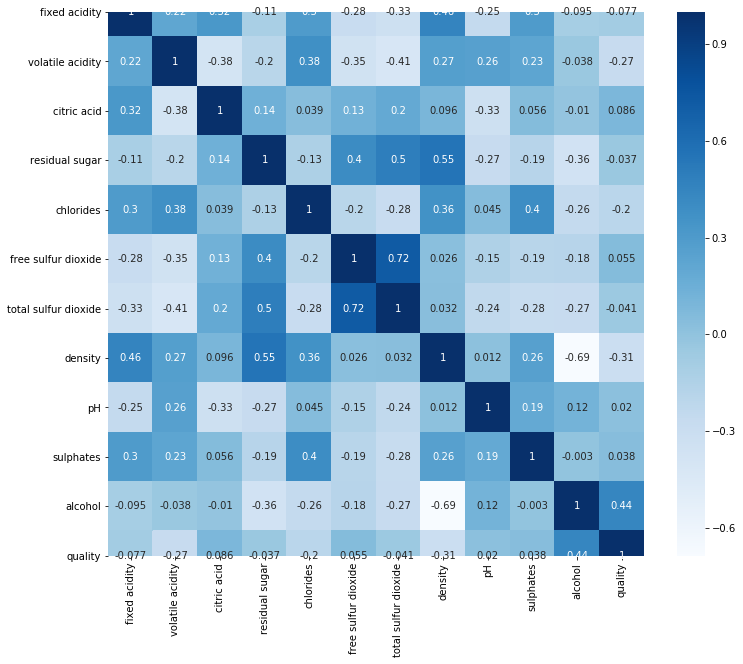

In [8]:
# check the correlation between the variables
# compute the correlation matrix
cor = df.corr()
fig = plt.figure(figsize = (12,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [9]:
# make a dummy variable for "color" so we can use it in a regression
dfDummies = pd.get_dummies(df['color'], prefix = 'color')
df = pd.concat([df, dfDummies], axis=1)

In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color_red,color_white
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000,1.000000


<Figure size 720x432 with 0 Axes>

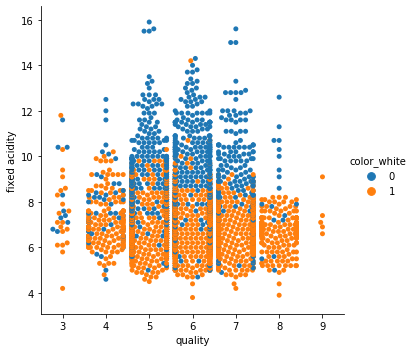

In [11]:
# get some idea of the data
fig = plt.figure(figsize = (10,6))
sns.catplot(x="quality", y="fixed acidity", hue="color_white", kind="swarm", data=df)

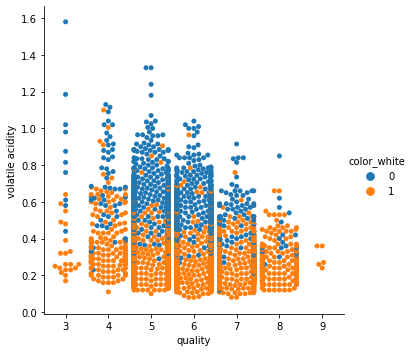

In [12]:
# inspect the relationship between quality and volatile acidity
sns.catplot(x = 'quality', y = 'volatile acidity', hue="color_white", kind="swarm", data = df)

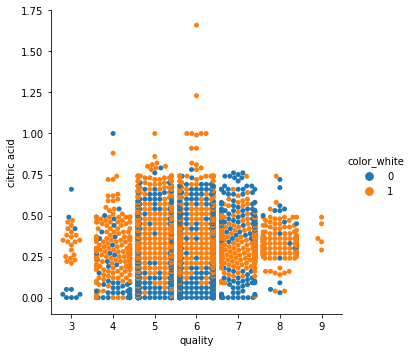

In [13]:
# inspect the relationship between quality and citric acid
sns.catplot(x="quality", y="citric acid", hue="color_white", kind="swarm", data=df)

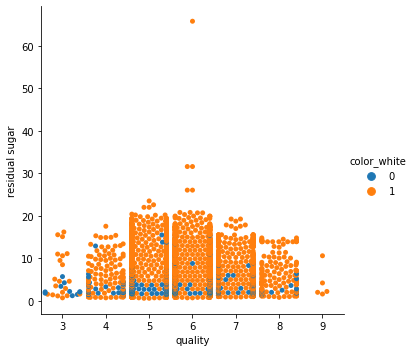

In [14]:
# inspect the relationship between quality and residual sugar
sns.catplot(x = 'quality', y = 'residual sugar', hue="color_white", kind="swarm", data = df)

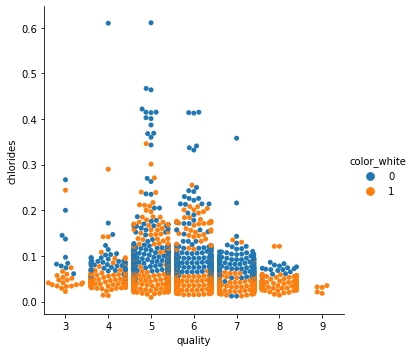

In [15]:
# inspect the relationship between quality and chlorides
sns.catplot(x = 'quality', y = 'chlorides', hue="color_white", kind="swarm", data = df)

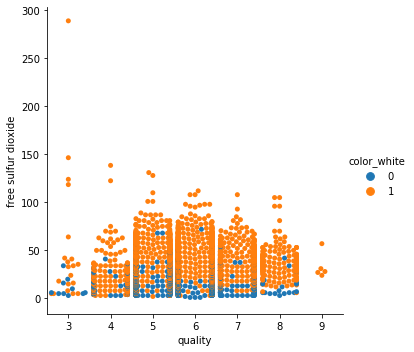

In [16]:
# inspect the relationship between quality and free sulfur dioxide
sns.catplot(x = 'quality', y = 'free sulfur dioxide', hue="color_white", kind="swarm", data = df)

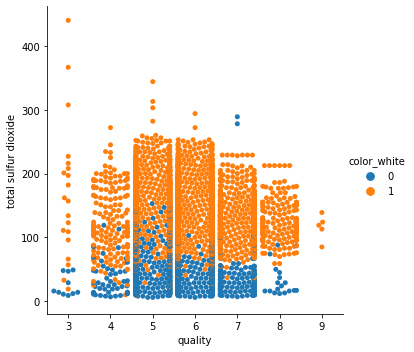

In [17]:
# inspect the relationship between quality and total sulfur dioxide
sns.catplot(x = 'quality', y = 'total sulfur dioxide', hue="color_white", kind="swarm", data = df)

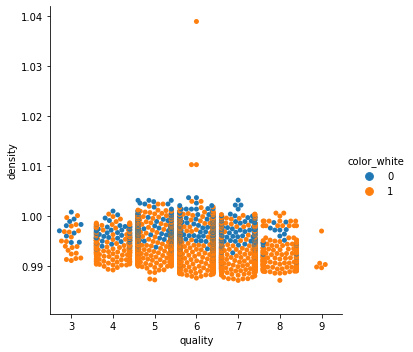

In [18]:
# inspect the relationship between quality and density
sns.catplot(x = 'quality', y = 'density', hue="color_white", kind="swarm", data = df)

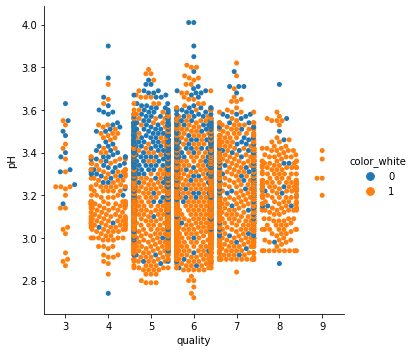

In [19]:
# inspect the relationship between quality and pH
sns.catplot(x = 'quality', y = 'pH', hue="color_white", kind="swarm", data = df)

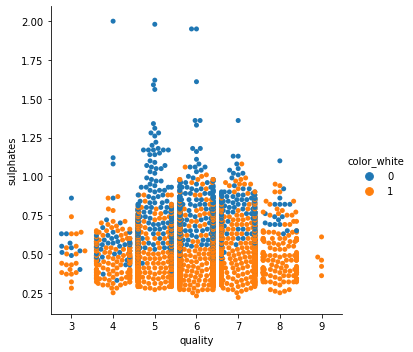

In [20]:
# inspect the relationship between quality and sulphates
sns.catplot(x = 'quality', y = 'sulphates', hue="color_white", kind="swarm", data = df)

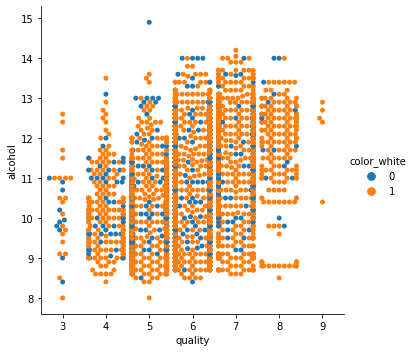

In [21]:
# inspect the relationship between quality and alcohol
sns.catplot(x = 'quality', y = 'alcohol', hue="color_white", kind="swarm", data = df)

In [22]:
df.to_csv(r'winedata.csv')